# Deep Reinforcement Learning

Deep Reinforcement Learning (DRL) -- i.e., the application of deep neural networks into the Reinforcement Learning (RL) framework -- has recently attracted a lot of attention in the machine learning community due to the significant amount of progress that has been made in the past few years. For instance, DRL is the theory behind AlphaGo, the program which was able to defeat world champion Lee Sedol in the ancient game of Go; or the theory that
allows computers learning to play ATARI games at a superhuman level! 

In this class we will learn about DRL, first exploring two of the most popular classes of reinforcement learning algorithms -- Q Learning, a value iteration method, and the Vanilla Policy Gradient, a method to directly optimize in the action space -- and then focusing in the Deep Q-Network algorithm.

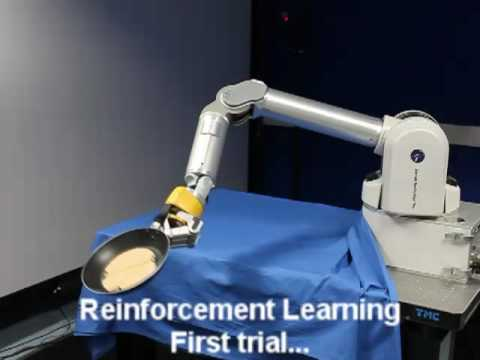

In [1]:
from IPython.display import YouTubeVideo
from datetime import timedelta

start = int(timedelta(seconds=22).total_seconds())

YouTubeVideo("W_gxLKSsSIE", start=start, autoplay=0, theme="light", color="red")

## Introduction to Reinforcement Learning

Reinforcement Learning is an area of machine learning that consists of learning from interaction how to behave in order to achieve a goal. An agent -- or learner -- must discover by trial-and-error which actions are the best in terms of the rewards that it receives and can receive in the future from the environmet.

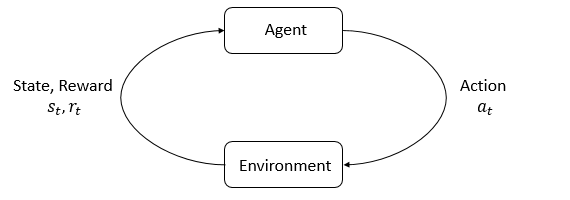





A popular example of reinforcement learning is a chess engine. Here, the
agent decides upon a series of moves depending on the state of the board (the environment), and the reward can be defined as win or lose at the end of the game.

A maze is another good example. In this case

• The agent is the intelligent program

• The environment is the maze

• The state is the place in the maze where the agent is

• The action is the move we take to move to the next state

• The reward is the points associated with reaching a particular state. It can be positive, negative, or zero


![](https://www.samyzaf.com/ML/rl/images/dcq.gif)
Fig. Maze example

### Exploration vs Exploitation dilemma

"_The general lesson learnt in reinforcement learning is that neither pure exploitation nor pure exploration are effective: they should be blended and, for effective learning, an optimal tradeoff must be found._", by M. Vergassola, E. Villermaux, B. I. Shraiman

In [2]:
from IPython.display import HTML

HTML("""
<video width="520" height="380" controls>
  <source src="../imgs/filmshr.mp4" type="video/mp4">
</video>
""")

__Multi-armed Bandit problem.__ Imagine you are in a casino facing multiple slot machines and each is configured with an unknown probability of how likely you can get a reward at one play. 

What is the best strategy to achieve highest long-term rewards?



In [24]:
import numpy as np

class BernoulliArm():
    # p probabilidad de exito
    def __init__(self, p):
        self.p = p
    
    # apuesta
    def draw(self):
        if np.random.random() > self.p:
            return 0.0
        else:
            return 1.0

In [25]:
arm1 = BernoulliArm(0.5)
arm2 = BernoulliArm(0.4)
arm3 = BernoulliArm(0.3)
arms = [arm1, arm2, arm3]
n_arms = 3

In [26]:
arm1.draw()

0.0

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt

In [36]:
class EpsilonGreedy():
    def __init__(self, epsilon):
        self.epsilon = epsilon
        self.counts = None
        self.values = None
    
    def initialize(self, a_arms):
        self.counts = [0 for arm in range(n_arms)]
        self.values = [0 for arm in range(n_arms)]
        
    def select_arm(self):
        # aplica la politica epsilon greedy
        if np.random.random() > self.epsilon:
            return np.argmax(self.values)
        else:
            return np.random.randint(len(self.values))
        
    #actualiza las estimaciones de probabilidad de cada maquina segun la maquina elegida
    def update(self, chosen_arm, reward):
        self.counts[chosen_arm] += 1
        n = self.counts[chosen_arm]
        value = self.values[chosen_arm]
        # suma de las veces que hemos jugado / num de intentos (partiendo del estado anterior)
        new_value = (n-1) * value / float(n)  + reward/float(n)# recompensa acumulada hasta este instante + recompensa
        self.values[chosen_arm] = new_value
    

In [46]:
# varios jugadores con diferentes tacticas
bandit1 = EpsilonGreedy(0.1)
bandit2 = EpsilonGreedy(0.0)
bandit3 = EpsilonGreedy(0.4)
bandit4 = EpsilonGreedy(1.0)

bandits = [bandit1,bandit2,bandit3,bandit4 ]

for bandit in bandits:
    bandit.initialize(n_arms)
    

In [47]:
iterations = 1000

rewards = np.zeros((len(bandits), iterations))

for t in range(iterations):
    for i, bandit in enumerate(bandits):
        #juega a una maquina
        chosen_arm = bandit.select_arm()
        # reward
        reward = arms[chosen_arm].draw()
        rewards[i][t] += reward
        # update
        bandit.update(chosen_arm, reward)

#show results
for i, bandit in enumerate(bandits):
    print("Counts of bandit %d in arm1 = %d, in arm2 = %d in arm3 = %d" % (i,bandit.counts[0], bandit.counts[1], bandit.counts[2]))

Counts of bandit 0 in arm1 = 771, in arm2 = 188 in arm3 = 41
Counts of bandit 1 in arm1 = 1000, in arm2 = 0 in arm3 = 0
Counts of bandit 2 in arm1 = 710, in arm2 = 135 in arm3 = 155
Counts of bandit 3 in arm1 = 329, in arm2 = 319 in arm3 = 352


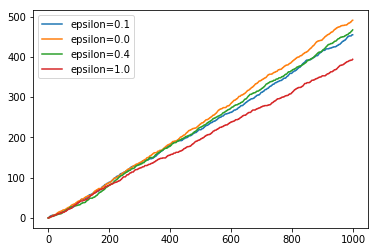

In [48]:
plt.plot(range(iterations), np.cumsum(rewards[0, :]), label = 'epsilon=0.1' )
plt.plot(range(iterations), np.cumsum(rewards[1, :]), label = 'epsilon=0.0' )
plt.plot(range(iterations), np.cumsum(rewards[2, :]), label = 'epsilon=0.4' )
plt.plot(range(iterations), np.cumsum(rewards[3, :]), label = 'epsilon=1.0' )
plt.legend(loc='best')

In [ ]:
EL parámetro epsilon ha de decrecer con el tiempo (primero somos explorativos y luego explotativos)

### Reinforcement Learning Elements

A reinforcement learning system should have the following elements in order to be defined: 

- State: it defines “how the environment is” at a particular time. 

- Policy: gives the behaviour of the agent at a given time. The policy maps states $S$ of the environment to actions $A$ to be taken. 

$$ \pi (S): S \rightarrow A $$

- Model of the environment (optional). It allows inferences to be made about how the environment will behave.
Methods for solving reinforcement learning problems when models are available
are called model-based methods. In other cases, the method is said to be model-free (trial-and-error learners).

We assume from now on the MDP property in our experiments, i.e., the future only depends on the current state, not the history.

- Reward signal: It is the feedback that the environment sends to the agent after executing an action. The goal in RL is to maximize the total long run reward

- Value function: specifies what is good in the long run, i.e., predicts the amount of long-term reward based on the selected action in the current state. 

If the sequence of rewards received after time step t is denoted
$r_{t+1}$, $r_{t+2}$, $r_{t+3}$,..., then the expected return, denoted $G_t$, is
defined as

$$G_t = r_{t+1} + \gamma r_{t+2} + \gamma^2 r_{t+3} + ··· + r_T = \sum_{k=0}^\infty \gamma^k r_{t+k+1}$$

where the discount rate $\gamma$ determines the present value of future rewards (it is worse as k grows).

Assuming the MDP property, the value function of a state $s$ under a policy $\pi$, denoted $V_{\pi}(s)$, can be then computed as the expected return

$$V_{\pi}(s) = E_{\pi} \{G_t | s_t = s\} = E_{\pi}\left \{\sum_{k=0}^\infty \gamma^k r_{t+k+1} | s_t = s\right \}$$

where $E_{\pi}\{\}$ denotes the expected value of a random variable given that the agent follows
policy $\pi$, and $t$ is any time step. We call the function $V_{\pi}$ the state-value function for policy $\pi$.

In the same way, we can define the action-value function $Q_{\pi}(s,a)$ as the value of taking action $a$ in state $s$ under a policy $\pi$:

$$Q_{\pi}(s, a) = E_{\pi} \{G_t | s_t = s, a_t = a\} = E_{\pi}\left \{\sum_{k=0}^\infty \gamma^k r_{t+k+1} | s_t = s, a_t = a\right \}$$

Most of the reinforcement learning methods involve the estimation of these value functions, as we will see later in the Q-Learning section.


![](../imgs/gridworld.png)


But before, let's see how to easily simulate a wide set of environments with the help of  the OpenAI Gym toolkit.

## OpenGym

OpenAI Gym is a Python-based framework that provides an environment to simulate many popular games in order to implement and practice the reinforcement learning algorithms.

All Gym environments expose a common interface, allowing you:
- to write general algorithms and 
- to compare them easily

Moreover, Gym is compatible with any numerical computation library, such as TensorFlow or Theano.

Next lines cover the basics to set and run a Gym environment

### Basics

To get the list of all the available environments in OpenAI Gym, use the following piece of code

In [54]:
# Import libraries
import gym
import matplotlib.animation as anm
from matplotlib import rc
rc('animation', html='html5')
#rc('animation', ffmpeg_path='/usr/bin/ffmpeg')

from matplotlib import animation
from JSAnimation.IPython_display import display_animation

In [55]:
all_env = list(gym.envs.registry.all())
for e in np.random.choice(list(all_env), 20):
    print(e)

EnvSpec(GravitarNoFrameskip-v0)
EnvSpec(GravitarDeterministic-v0)
EnvSpec(Frostbite-ramDeterministic-v0)
EnvSpec(Boxing-v4)
EnvSpec(PrivateEye-v0)
EnvSpec(CrazyClimber-ramNoFrameskip-v0)
EnvSpec(Boxing-v0)
EnvSpec(ZaxxonDeterministic-v0)
EnvSpec(Frostbite-ram-v4)
EnvSpec(VentureNoFrameskip-v4)
EnvSpec(SeaquestDeterministic-v0)
EnvSpec(Breakout-ramDeterministic-v0)
EnvSpec(MontezumaRevengeDeterministic-v4)
EnvSpec(WizardOfWor-ramDeterministic-v0)
EnvSpec(AirRaid-ram-v0)
EnvSpec(Frostbite-ramDeterministic-v0)
EnvSpec(Jamesbond-ramNoFrameskip-v4)
EnvSpec(DoubleDunk-v0)
EnvSpec(NameThisGame-ramDeterministic-v0)
EnvSpec(AtlantisNoFrameskip-v0)


In OpenAI Gym, each environment is represented by an env object. Each env object contains the following main functions:
 - make: creates the environment by passing an id string (environment name).


In [57]:
env = gym.make('GravitarNoFrameskip-v0')

[2019-01-18 18:26:02,043] Making new env: GravitarNoFrameskip-v0


DependencyNotInstalled: No module named 'atari_py'. (HINT: you can install Atari dependencies by running 'pip install gym[atari]'.)

- reset: resets the environment to the original state. It is the function you need to call when run a process for the first time, so it returns an initial observation

- render: creates a visual representation of the environment. From now on, we will use the following function to render an experiment:

In [ ]:
def env_render(env_vis):
    """
    param env_vis: List of env.render(mode = 'rgb_array') objects
    """
    plt.figure()
    plot = plt.imshow(env_vis[0])
    plt.axis('off')
    def animate(i):
        plot.set_data(env_vis[i])

    anim = anm.FuncAnimation(plt.gcf(),
                             animate,
                             frames=len(env_vis),
                             interval=20,
                             repeat=True,
                             repeat_delay=20)
    display(display_animation(anim, default_mode='loop'))

In [ ]:
env_render([env.render(mode = 'rgb_array')])

The next two functions are of type 'Space', and they are useful for describing the format of valid actions and observations:
- env.action_space: defines the set of action

- env.observation_space: as before, this function defines the set of observations

The observation space can be discrete (gym.spaces.Discrete) or continous (gym.spaces.Box)

On the other hand, observations and rewards are obtained using the step function. Let us review it:
- step: takes an action object as an argument and returns four objects:
    - observation: An object implemented by the environment, representing the observation of the environment.
    - reward: A signed float value indicating the gain (or loss) from the previous action.
    - done: A Boolean value representing if the scenario is finished. 
    - info: A Python dictionary object representing the diagnostic information.
 

## Our use cases: CartPole-v0 and Pong-v0

Cartpole is an inverted pendulum with a center of gravity above its pivot point. 
In essence, a pole is attached by an un-actuated joint to a cart, which moves along a frictionless track.
The system is controlled by applying a force of +1 or -1 to the cart. This force moves the pivot point under the center of mass to keep the pole balanced, preventing it from falling over.



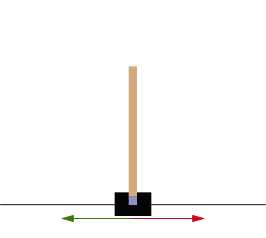
In the above figure, the violet square indicates the pivot point. Red and green arrows show possible horizontal forces that can be applied to the pivot point

A failure is said to occur if the pole falls past 15 degrees from the vertical, or the cart moves more than 2.4 units from the center. Therefore, the reward in this case could be +1 for every time step on which failure did not occur,   and the return at each time could be computed as the number of steps until failure. Naturally, the return is maximized by keeping the pole balanced for as long as possible.

Take a look at a video below with a real-life demonstration of a cartpole problem learning process.

In [ ]:
YouTubeVideo("XiigTGKZfks")

Using the above definitions for OpenAI Gym, print the state space dimension and her bounds for the CartPole-v0 environment:

Run and visualize the result of applying a random policy to the cartPole-vo problem.

EXERCISE: Do the same for the Pong-v0 environment for one episode and 300 steps.

### Q-Learning
Q-Learning is a model-free, off-policy temporal difference control algorithm developed by Watkins in 1989.
This means that the agent learns from experience adopting the best Q value independently of the current policy.

In essence, this method learns an action-value function and update it according to the Bellman equation using the relation:

$$Q\left(s_t, a_t\right) = Q\left(s_t, a_t\right) + \alpha \left(R_{t+1} + \gamma  max_a Q(s_{t+1}, a) - Q\left(s_t, a_t\right) \right)$$

The Bellman equation is a recurrent equation that expresses
a relationship between the value of a state and the values of
its successor states, and allows for finding the optimal policy in a RL problem.

In this case, the learned action-value function, $Q$, directly approximates the optimal
action-value function.

**The algorithm**

We can break the algorithm into the next 4 steps:

1.-At time step $t$, we start from state $S_t$ and pick action according to the Q values, 

$$A_t=argmax_{a\in A} Q\left(S_t,a\right)$$ ; $\epsilon$-greedy is commonly applied.

2.- With action $A_t$, we observe reward $R_{t+1}$ and get into the next state $s_{t+1}$.

3.- Update the action-value function: 

$$Q\left(S_t,A_t\right) \leftarrow Q\left(S_t,A_t\right)+\alpha(R_{t+1}+\gamma max_{a \in A} Q\left(S_{t+1},a\right)−Q\left(S_t,A_t\right))$$

4.- $t = t+1$ and repeat from step 1.

$Q(s, a)$ can be implemented as a Q-Table or as a neural network (known as a Q-Network). In both cases, the task of the Q-Table or the Q-Network is to provide the best possible action based on the Q value of the given input. The Q-Table-based approach generally becomes intractable as the Q-Table becomes large, thus making neural networks the best candidate for approximating the Q-function. 

**Implementing Q-learning with a Q-Table**

In a Q-table, each row represent a possible state in which the agent could be. Columns represent the possible actions in the environment. Each cell of the table keep a q-value.

The steps required to implement the Q-Table solution are:

1.- Discretize the state space with the help of the [wrapper](https://github.com/openai/gym/tree/master/gym/wrappers):

In [ ]:
class DiscretizedObservationWrapper(gym.ObservationWrapper):
    """This wrapper converts a Box observation into a single integer.
    """
    def __init__(self, env, n_bins=10, low=None, high=None):
        super().__init__(env)
        assert isinstance(env.observation_space, gym.spaces.Box)

        low = self.observation_space.low if low is None else low
        high = self.observation_space.high if high is None else high

        self.n_bins = n_bins
        self.val_bins = [np.linspace(l, h, n_bins + 1) for l, h in
                         zip(low, high)]
        self.observation_space = gym.spaces.Discrete(n_bins ** np.array(low).shape[0])

    def _convert_to_one_number(self, digits):
        return sum([d * ((self.n_bins + 1) ** i) for i, d in enumerate(digits)])

    def observation(self, observation):
        digits = [np.digitize([x], bins)[0]
                  for x, bins in zip(observation.flatten(), self.val_bins)]
        return self._convert_to_one_number(digits)


In [ ]:
# Discretize the state space using the DiscretizedObservationWrapper class
env = gym.make('CartPole-v0')
num_states = 10
env = DiscretizedObservationWrapper(env, n_bins=num_states, 
                                    low=[-2.4, -2.0, -0.42, -3.5], 
                                    high=[2.4, 2.0, 0.42, 3.5])
num_actions = env.action_space.n

2.- Implement the Q-value function $Q(s,a)$ using either a python dict or a numpy array:

In [ ]:
from collections import defaultdict
Q = defaultdict(float)

def update_Q(env, s, r, a, s_next, done, params):
    pass

3.Define an $\epsilon$-greedy policy:

In [ ]:
def policy_q_table(state, env, params):
    pass


4.- Define a function to run an episode:

In [ ]:
def episode(env, params):
    pass

5.- Collect all episodes in a function that runs over a given number of episodes: 

In [ ]:
def experiment(env, params):
    pass


6.- To conclude, run an experiment with the following parameters:

In [ ]:
params = {'gamma': 0.99, 
          'alpha': 0.5,
          'learning_rate': 0.8,
          'discount_rate': 0.9,
          'explore_rate': 0.2,
          'exploration_decay': 0.1,
          'n_episodes': 100,
          'r_max': 0, 
          't_max': 0
         }

experiment(env, params)

**Q-Network**

As it said before, the Q value can be approximated using an Artifical Neural Network, that can be a multi-layer dense neural network, a convolutional network, or a recurrent network, depending on the problem.
In our case, we will simulate a multi-layer neural network, with loss function:

$$ L = \left( r + \gamma max_{a'}{\hat{Q}\left( s, a' \right)} - Q\left( s, a \right)\right )^2$$

The steps necessary to implement the neural network solution are described now:

0.- Build a neural network with two hidden layers (24 neurons and relu activation function). The input layer has dimension equal to the number of states, while the output dimension is equal to the number of actions.

In [ ]:
# import necessary modules from keras
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

tb = TensorBoard(log_dir='./QN_logs', histogram_freq=1)
#tensorboard --logdir=./logs

# Neural Net for Deep-Q learning Model
def q_network(num_states, num_actions):
    #return model
    pass


1.- Redefine the e-greedy policy function.

In [ ]:
def policy_q_nn(env, state, params):
    pass 


2.- Fit the model

In [ ]:
def update_q_network(state, action, reward, next_state, done):
    pass
        

2.- Adapt the episode function to run Q-Network

In [ ]:
def DQN_episode(env, params):
    pass

3.- Modify the experiment function and run the code with the following set of hyperparameters:

In [ ]:
params = {'learning_rate': 0.8,
          'discount_rate': 0.9,
          'epsilon': 1.0,
          'epsilon_min': 0.01,
          'epsilon_decay': 0.995,
          'n_episodes': 100,
          'r_max': 0,
          't_max': 0
         }

In [ ]:
# Experiment
def experiment_dqn(env, params):
    pass

In [ ]:
# Run the experiment
env = gym.make('CartPole-v1')
state_size = env.observation_space.shape[0]
action_size = env.action_space.n
#state = np.reshape(state, [1, state_size])
model = q_network(state_size, action_size)
model.compile(loss='mse', optimizer=Adam(lr=params['learning_rate']))
experiment_dqn(env, params)

What do you observe from the results?

### Experience replay
In order to smooth the learning procedure and remove the possible correlations in the observation sequence, we will use the so called experience replay technique.

Shortly, experience replay stores the agent’s experience at each time step $e_t=(s_t,a_t,r_t,s_{t+1})$ in a replay memory that is accessed to perform the weight updates. As samples are drawn at random from the replay memory during Q-learning updates, one sample could be used multiple times. 
Experience replay improves data efficiency, removes correlations in the observation sequences, and smooths over changes in the data distribution.

Let us implement it :)

### Vanilla Policy Gradient

In contrast with the classical action-value methods, policy gradients (PG) do not need to learn the values of actions in order to define a policy. Instead, PG learn directly a parameterized policy -- i.e, can select actions without consulting a value function -- pushing up the probabilities of actions that lead to higher return, and down the probabilities of actions that lead to lower return. PG are appropiate, for instance, when the state space of the problem at hand is large.

In policy gradient methods, the probability that action $a$ is taken at time $t$ given that the environment is in state $s$ at time $t$ with parameter $\theta$ can be written then as:

$$\pi(a|s, \theta) = Pr \left\{A_t = a | S_t = s, \theta_t = \theta \right\}$$

The policy gradient algorithm works by updating policy parameters via stochastic gradient ascent on policy performance:

$$\theta_{t+1} = \theta_t + \alpha \widehat{\nabla_{\theta} J(\pi_{\theta_t})}$$

where $\widehat{\nabla J(\pi_{\theta_t})}$ is a stochastic estimate whose expectation approximates the gradient of the performance measure with respect to its argument $\theta_t$

$$\nabla J(\pi_{\theta_t}) = E_{\tau \sim \pi_{\theta}} \left \{ \sum_{t=0}^T \nabla_{\theta} log \pi_{\theta} (a_t|s_t) A^{\pi_{\theta}} (s_t, a_t) \right \} $$ 

where $\tau$ is a trajectory and $A^{\pi_{\theta}}$ is the advantage function for the current policy:

$$A^{\pi} (s, a) = Q^{\pi}(s, a) - V^{\pi}(s)$$


Action preferences can be parameterized arbitrarily. For instance, they might be computed by an artificial neural network (ANN), where $\theta$ is the vector of all the connection weights of the network. Let's see how it works using the Pong-v0 environment.

#### Solving Pong-v0 with VPG

In this case, we just code a neural network that outputs a probability of moving up (define the policy), and takes as input simply the sequence of frames it gets from observations.

![](https://blog.floydhub.com/content/images/2018/12/image-2.png)

EXERCISE: Implement a policy network consisting of a 3 fully connected layers. The first one, the input, has dimensions $80x80$. The hidden layer should have 200 units with relu activation. Initialize this layer using glorot uniform. The output consists of one neuron activated with a sigmoid function (take kernel_initializer='RandomNormal').

Which loss function should be applied in this problem?

Note 1: The 80 * 80 input dimension comes from a pre-processing step to filter important pixels (those which define the balls and the paddle) and to express things like the direction of the ball (computed from the difference between two consecutive frames).

Note 2: We use a sigmoid activation in the output layer because it must predict a probability of choosing the action UP.


In [ ]:
#Define and compile the network model

Code for the preprocessing step and the discounted rewards:

In [ ]:
import numpy as np

# preprocessing used by Karpathy (cf. https://gist.github.com/karpathy/a4166c7fe253700972fcbc77e4ea32c5)
def prepro(I):
    """ prepro 210x160x3 uint8 frame into 6400 (80x80) 1D float vector """
    I = I[35:195] # crop
    I = I[::2,::2,0] # downsample by factor of 2
    I[I == 144] = 0 # erase background (background type 1)
    I[I == 109] = 0 # erase background (background type 2)
    I[I != 0] = 1 # everything else (paddles, ball) just set to 1
    return I.astype(np.float).ravel()

# reward discount used by Karpathy (cf. https://gist.github.com/karpathy/a4166c7fe253700972fcbc77e4ea32c5)
def discount_rewards(r, gamma):
    """ take 1D float array of rewards and compute discounted reward """
    r = np.array(r)
    discounted_r = np.zeros_like(r)
    running_add = 0
    # we go from last reward to first one so we don't have to do exponentiations
    for t in reversed(range(0, r.size)):
        if r[t] != 0: running_add = 0 # if the game ended (in Pong), reset the reward sum
        running_add = running_add * gamma + r[t] # the point here is to use Horner's method to compute those rewards efficiently
        discounted_r[t] = running_add
    discounted_r -= np.mean(discounted_r) #normalizing the result
    discounted_r /= np.std(discounted_r) #idem
    return discounted_r

Now, let's initialize the gym environment, the main variables and the hyperparameters:

In [ ]:
# gym initialization
env = gym.make("Pong-v0")
observation = env.reset()
prev_input = None

# Macros
UP_ACTION = 2
DOWN_ACTION = 3

# Hyperparameters
gamma = 0.99

# initialization of variables used in the main loop
x_train, y_train, rewards = [],[],[]
reward_sum = 0
episode_nb = 0

EXERCISE: Implement and run the main loop:

## RL Frameworks for keras: keras-rl

Find more info [here](https://github.com/keras-rl/keras-rl)

In [ ]:
import numpy as np
import gym

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam

from rl.agents.dqn import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory


ENV_NAME = 'CartPole-v0'


# Get the environment and extract the number of actions.
env = gym.make(ENV_NAME)
np.random.seed(123)
env.seed(123)
nb_actions = env.action_space.n

# Next, we build a very simple model.
model = Sequential()
model.add(Flatten(input_shape=(1,) + env.observation_space.shape))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(nb_actions))
model.add(Activation('linear'))
print(model.summary())

# Finally, we configure and compile our agent. You can use every built-in Keras optimizer and
# even the metrics!
memory = SequentialMemory(limit=50000, window_length=1)
policy = BoltzmannQPolicy()
dqn = DQNAgent(model=model, nb_actions=nb_actions, memory=memory, nb_steps_warmup=10,
               target_model_update=1e-2, policy=policy)
dqn.compile(Adam(lr=1e-3), metrics=['mae'])

# Okay, now it's time to learn something! We visualize the training here for show, but this
# slows down training quite a lot. You can always safely abort the training prematurely using
# Ctrl + C.
dqn.fit(env, nb_steps=50000, visualize=True, verbose=2)

# After training is done, we save the final weights.
dqn.save_weights('dqn_{}_weights.h5f'.format(ENV_NAME), overwrite=True)

# Finally, evaluate our algorithm for 5 episodes.
dqn.test(env, nb_episodes=5, visualize=True)